In [1]:
import numpy as np
from matplotlib import pyplot
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (17,10)

In [18]:
class BaseScenario(object):  
    def __init__(self):
        self.cases = [1]
        self.remaining_lockdown = 0
    
    def simulate(self):
        for step in range(self.duration):
            self.cases.append(self.next(step, self.cases[-1]))
    
    def plot(self):
        for i, celebration in enumerate(self.celebrations):
            pyplot.plot([celebration, celebration],
                        [0, max(self.cases)],
                        color="red",
                        label="celebrations" if i == 0 else "")

        pyplot.plot(range(len(self.cases)), self.cases, label="COVID-19 cases")
        pyplot.legend()
        pyplot.show()

In [19]:
class Scenario(BaseScenario):
    def __init__(self,
                 lockdown_duration: int,
                 duration: int,
                 critical: int,
                 celebrations: list,
                 r0: dict):
        super(Scenario, self).__init__()
        self.lockdown_duration = lockdown_duration
        self.duration = duration
        self.critical = critical
        self.celebrations = celebrations
        self.r0 = r0
                    
    def next(self, step:int, previous_infected:int):
        if self.remaining_lockdown > 0:
            r0 = self.r0["lockdown"]
            self.remaining_lockdown -= 1
        elif previous_infected > self.critical:
            r0 = self.r0["lockdown"]
            self.remaining_lockdown = self.lockdown_duration
        else:
            r0 = self.r0["regular"]

        if step in self.celebrations:
            r0 *= self.r0["high"]

        if previous_infected > self.critical:
            return r0*previous_infected
        else:
            return r0*previous_infected

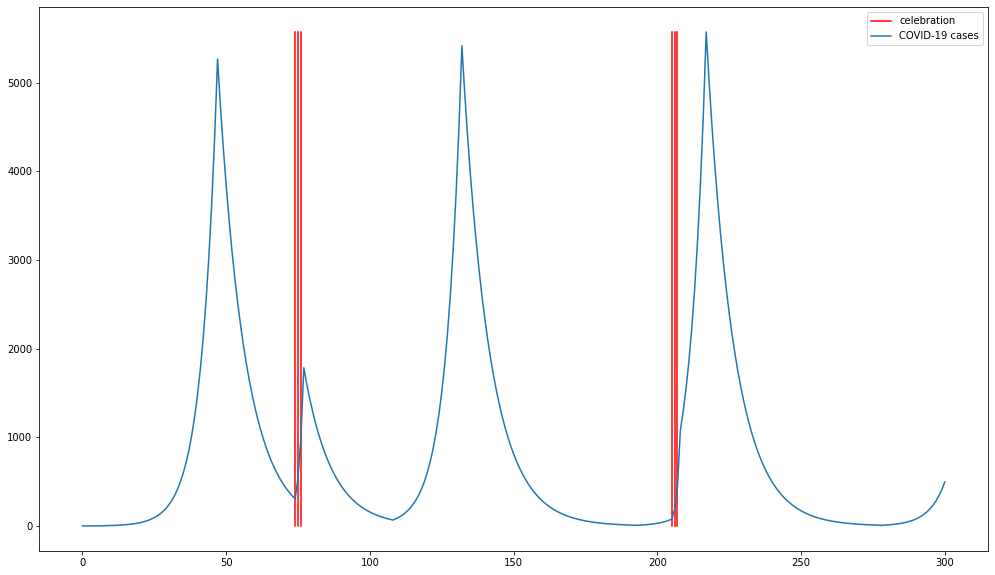

In [20]:
s = Scenario(
    lockdown_duration = 60,
    duration = 300,
    critical = 5000,
    celebrations = [
                    74, 75, 76,     # Celebration + lockdown
                    205, 206, 207   # Celebration but no lockdown
                   ], 
    r0 = {
        "regular": 1.2,
        "high": 2,
        "lockdown": 0.9,
    }
)
s.simulate()
s.plot()

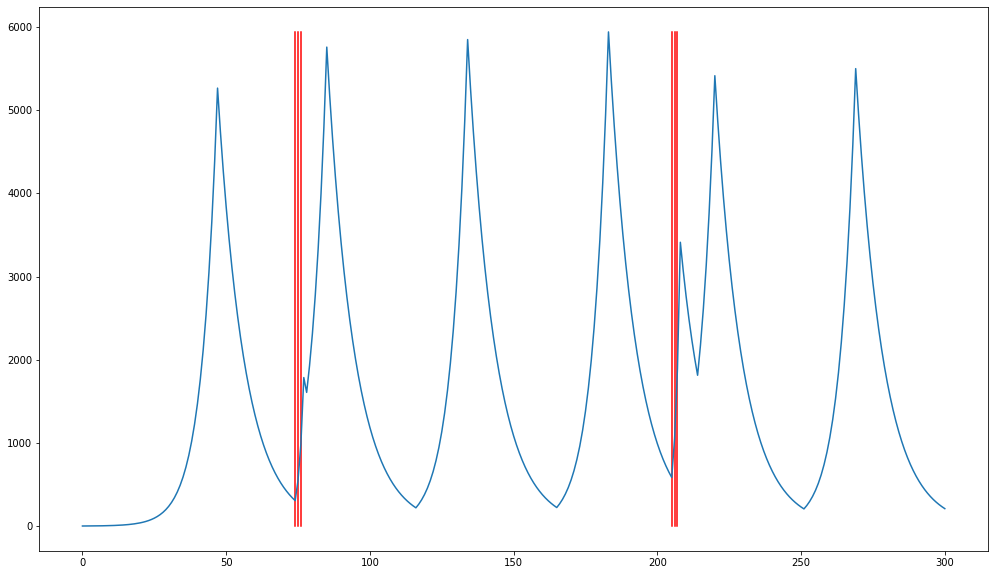

In [8]:
s = Scenario(
    lockdown_duration = 30,
    duration = 300,
    critical = 5000,
    celebrations = [
                    74, 75, 76,     # Celebration + lockdown
                    205, 206, 207   # Celebration but no lockdown
                   ], 
    r0 = {
        "regular": 1.2,
        "high": 2,
        "lockdown": 0.9,
    }
)
s.simulate()
s.plot()